# Classifying Fashion with a CNN

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.

https://github.com/zalandoresearch/fashion-mnist

Objective:

Train an Convolutional Neural Network on this dataset

In [6]:
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt 
from tensorflow.keras import models, layers

## Load data


In [7]:
#load data
(dataset_train_original, dataset_validate_original), info = tfds.load(
    'fashion_mnist',
    split=['train[:80%]', 'train[80%:]'],
    # dataset has 2-tuple structure (input, label / x, y)
    as_supervised=True,
    with_info=True
)

In [8]:
info

tfds.core.DatasetInfo(
    name='fashion_mnist',
    version=3.0.1,
    description='Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.',
    homepage='https://github.com/zalandoresearch/fashion-mnist',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{DBLP:journals/corr/abs-1708-07747,
      author    = {Han Xiao and
                   Kashif Rasul and
                   Roland Vollgraf},
      title     = {Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning
                   Algorithms},
      journal   = {CoRR},
      volume

## Viewing a sample of the dataset

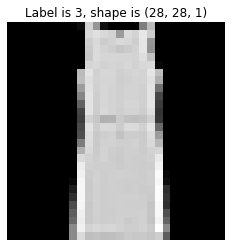

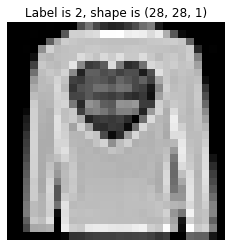

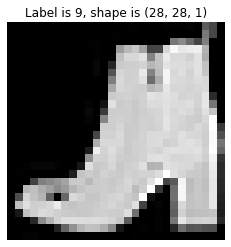

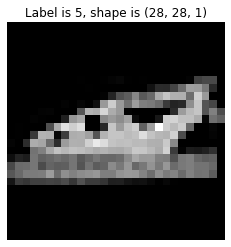

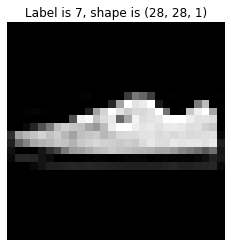

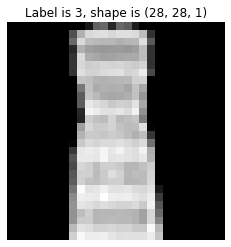

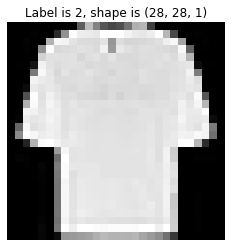

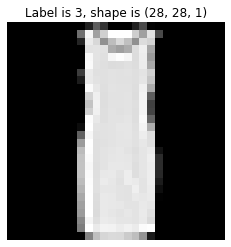

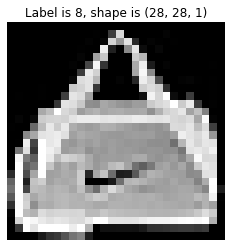

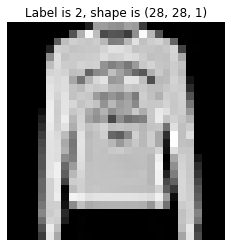

In [9]:
for x, y in dataset_train_original.shuffle(20000).take(10):
  #2d for grayscale
  plt.imshow(x.numpy().reshape((28,28)),cmap='gray')
  plt.title(f"Label is {y}, shape is {x.shape}")
  plt.axis("off")
  plt.show()
  plt.close()

## Pre-processing data

In [10]:
#Load keras model and cache it in a variable without having to reload
dataset_train = dataset_train_original.cache().shuffle(48000).batch(128)
dataset_validate = dataset_validate_original.cache().batch(128)

In [11]:
for x, y in dataset_train.take(1):
  print("x", x.shape)
  print("y", y.shape)

# why is x 4-dimensional?: batch_size and x

x (128, 28, 28, 1)
y (128,)


In [12]:
for x, y in dataset_train.take(1):
  print('x', x.shape)
  print('y', y.shape)

x (128, 28, 28, 1)
y (128,)


## Build and train a model

In [21]:
from tensorflow.keras.layers import Dropout

model = models.Sequential()

#input layer
model.add(layers.Conv2D(64, kernel_size=(3,3), padding='same', activation='relu', input_shape=(28,28,1)))

model.add(layers.MaxPool2D(pool_size=(2,2)))

model.add(layers.Conv2D(64, kernel_size=(3,3), activation="relu"))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(layers.Conv2D(128, kernel_size=(3,3), activation="relu"))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

#flatten and final dense layer
model.add(layers.Flatten())
model.add(layers.Dense(100, activation="relu"))
model.add(layers.Dense(10,activation='softmax'))


In [22]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)
#if metric is loss, needs to be minimized, accuracy needs to be maximized

In [23]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 12, 12, 64)        36928     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 6, 6, 64)          0         
                                                                 
 conv2d_20 (Conv2D)          (None, 4, 4, 128)        

In [24]:
model.compile(
    optimizer='adam',
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [25]:
model.fit(
    dataset_train,
    epochs=100,
    validation_data=dataset_validate, callbacks=[early_stop])

Epoch 1/100
375/375 [==============================] - 10s 23ms/step - loss: 1.5501 - accuracy: 0.6124 - val_loss: 0.5510 - val_accuracy: 0.8055
Epoch 2/100
375/375 [==============================] - 6s 16ms/step - loss: 0.6520 - accuracy: 0.7600 - val_loss: 0.4818 - val_accuracy: 0.8331
Epoch 3/100
375/375 [==============================] - 6s 15ms/step - loss: 0.5756 - accuracy: 0.7875 - val_loss: 0.4315 - val_accuracy: 0.8453
Epoch 4/100
375/375 [==============================] - 6s 15ms/step - loss: 0.5314 - accuracy: 0.8057 - val_loss: 0.4133 - val_accuracy: 0.8549
Epoch 5/100
375/375 [==============================] - 6s 15ms/step - loss: 0.4937 - accuracy: 0.8174 - val_loss: 0.3909 - val_accuracy: 0.8530
Epoch 6/100
375/375 [==============================] - 6s 15ms/step - loss: 0.4709 - accuracy: 0.8261 - val_loss: 0.3758 - val_accuracy: 0.8641
Epoch 7/100
375/375 [==============================] - 6s 15ms/step - loss: 0.4487 - accuracy: 0.8321 - val_loss: 0.3581 - val_accuracy

## Evaluation

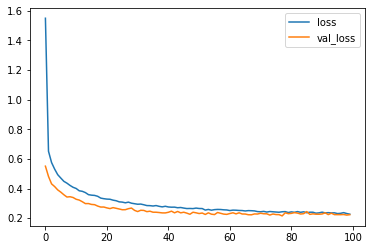

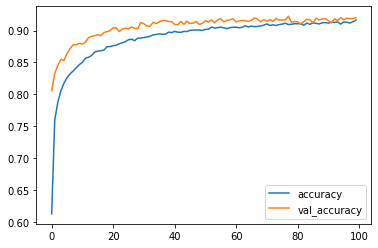

In [32]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
plt.close()

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()
plt.close()